### Reading one of the keypoints json file for warrior and incorrect warrior

Link to the key points map:
https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/doc/media/keypoints_pose_25.png

In [311]:
import json
from pprint import pprint
import numpy as np

In [312]:
with open('warrior/warrior_000000000039_keypoints.json') as f:
    data = json.load(f)

with open('warrior_incorrect/warrior_incorrect_000000000033_keypoints 8.28.45 PM.json') as f1:
    data1 = json.load(f1)
pprint(data)

{'people': [{'face_keypoints_2d': [],
             'face_keypoints_3d': [],
             'hand_left_keypoints_2d': [],
             'hand_left_keypoints_3d': [],
             'hand_right_keypoints_2d': [],
             'hand_right_keypoints_3d': [],
             'pose_keypoints_2d': [664.67,
                                   202.318,
                                   0.920632,
                                   693.989,
                                   257.204,
                                   0.885338,
                                   646.996,
                                   257.136,
                                   0.816551,
                                   572.582,
                                   237.529,
                                   0.808893,
                                   478.507,
                                   216.048,
                                   0.76705,
                                   737.126,
                                   257.193,

In [313]:
# Let's take only 'pose_keypoints_2d' array
# The array is of length 75 and gives location of 25 keypoints
# x, y and third number is always a confidence level of them between 0 and 1
warrior = data['people'][0]['pose_keypoints_2d']
warrior_incorrect = data1['people'][0]['pose_keypoints_2d']

In [314]:
print(warrior)

[664.67, 202.318, 0.920632, 693.989, 257.204, 0.885338, 646.996, 257.136, 0.816551, 572.582, 237.529, 0.808893, 478.507, 216.048, 0.76705, 737.126, 257.193, 0.818614, 817.488, 259.045, 0.890326, 882.072, 259.149, 0.852787, 709.634, 411.881, 0.74827, 674.402, 411.899, 0.716526, 572.529, 456.959, 0.843002, 570.525, 588.283, 0.823482, 742.945, 409.944, 0.712613, 807.584, 503.957, 0.835228, 886.094, 584.247, 0.834873, 664.595, 194.506, 0.757584, 678.291, 194.456, 0.921337, 0, 0, 0, 709.628, 200.305, 0.813924, 915.438, 599.952, 0.73225, 917.393, 588.25, 0.801977, 886.1, 588.304, 0.739586, 515.785, 611.72, 0.590162, 521.64, 603.909, 0.591926, 576.533, 601.942, 0.748496]


In warrior 2, the front knee should be 90 degrees angle.
To check if it is the case, we can check if the front thigh is parallel to the floor. We would analyze right hip point and right knee point. Their y-coordinates should be the same and the difference would be close to zero.

In [315]:
# Almost correct or acceptable warrior
print(f"Diff between y's {warrior[31] - warrior[28]}")

right hip: x - 709.634, y - 411.881, c - 0.74827
right knee: x - 674.402 , y - 411.899,  c - 0.716526
Diff between y's 45.06


In [316]:
# Incorrect warrior position has high y difference of thigh and knee
print(f"Diff between y's {warrior_incorrect[31] - warrior_incorrect[28]}")

Diff between y's 84.18100000000004


### Reading all json files for warrior and warrior_incorrect

Outout of OpenPose is about 40 json files (keypoints arrays) per second. Let's examine all keypoints from all json files

In [318]:
path_to_json = '/Users/Katja/Desktop/openpose/output/warrior/'

In [319]:
from pathlib import Path
PATH = Path(path_to_json)
files = list(PATH.iterdir())

In [320]:
warrior = []
for js in files:
    data = json.load(open(js,"r"))
    keypoints = data['people'][0]['pose_keypoints_2d']
    warrior.append(keypoints)

In [321]:
len(warrior)

117

In [322]:
path_to_json = '/Users/Katja/Desktop/openpose/output/warrior_incorrect/'
PATH = Path(path_to_json)
files = list(PATH.iterdir())

In [323]:
warrior_incorrect = []

for js in files:
    try:
        data = json.load(open(js,"r"))
        keypoints = data['people'][0]['pose_keypoints_2d']
        warrior_incorrect.append(keypoints)
    except:
        continue

In [324]:
len(warrior_incorrect)

77

Let's plot the points

In [325]:
x_warrior = []
y_warrior = []
ct = 0
for keypose in warrior:
    for c, i in enumerate(keypose):
        if (c%3) == 0:
            x_warrior.append(i)
        if (c%3) == 1:
            y_warrior.append(i)

In [326]:
len(x_warrior)
len(y_warrior)

2925

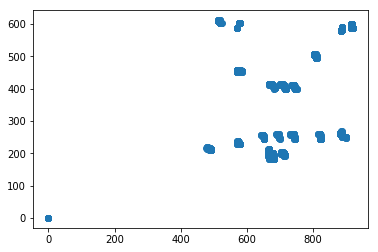

In [327]:
# Interestingly the points are upside down
from matplotlib.pyplot import scatter
import matplotlib as plt
scatter(x_warrior, y_warrior)

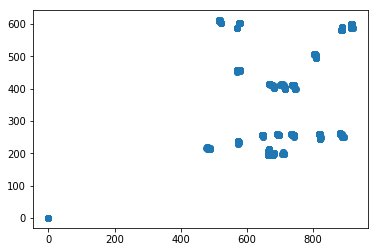

In [328]:
# seems like I am moving a bit too much in the position, and indeed
# in the video I am adjusting the pose, so lets plot just the time
# slot when I am stable in the pose:
scatter(x_warrior[:1000], y_warrior[:1000])

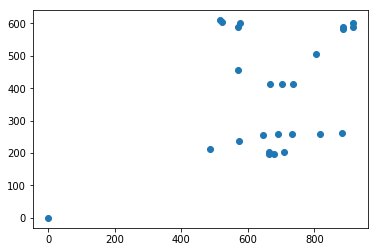

In [329]:
x = []
y = []
ct = 0
for keypose in warrior:
    for c, i in enumerate(keypose):
        if (c%3) == 0:
            x.append(i)
        if (c%3) == 1:
            y.append(i)
    ct +=1
    if ct == 1:
        break
scatter(x, y)

In [330]:
# seems like numeration in OpenPose is not accurate, trying to locate knee and hip index
# front knee - 10 (31), front hip 9 (28)
for i, (x, y) in enumerate(zip(x, y)):
    print(i, x, y)

0 664.68 204.282
1 692.073 259.115
2 646.98 257.194
3 572.597 237.509
4 486.393 214.08
5 733.252 259.146
6 817.48 259.187
7 882.115 263.01
8 701.833 411.951
9 666.67 413.823
10 570.518 455.046
11 570.506 588.25
12 735.195 411.875
13 803.761 505.878
14 885.959 582.313
15 664.618 196.342
16 678.32 196.323
17 0 0
18 707.775 204.212
19 915.343 599.976
20 915.486 588.272
21 886.034 588.197
22 515.76 609.804
23 521.606 603.885
24 576.51 601.873


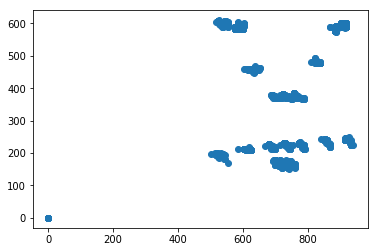

In [332]:
# Scatter of incorrect warrior
x_warrior_incorrect = []
y_warrior_incorrect = []

for keypose in warrior_incorrect:
    for c, i in enumerate(keypose):
        if (c%3) == 0:
            x_warrior_incorrect.append(i)
        if (c%3) == 1:
            y_warrior_incorrect.append(i)
scatter(x_warrior_incorrect, y_warrior_incorrect)

Let's examine again the right thigh and right knee difference

In [333]:
warrior_front_knee = []
ct = 0
for keypoints in warrior:
    diff = keypoints[31] - keypoints[28]
    warrior_front_knee.append(diff)
    ct += 1
    if ct == 300: #taking only the stable position in the video
        break

In [334]:
np.mean(warrior_front_knee)

45.904435897435896

In [336]:
warrior_incorrect_front_knee = []
for keypoints in warrior_incorrect:
    diff = keypoints[31] - keypoints[28]
    warrior_incorrect_front_knee.append(diff)

In [337]:
np.mean(warrior_incorrect_front_knee)

85.13681818181819

We can see that the mean of all front knee and thigh keypoints in correct warrior are about 46 and in incorrect the difference is higher at 85 showing that the knee angle is unlikely to be 90 degrees.